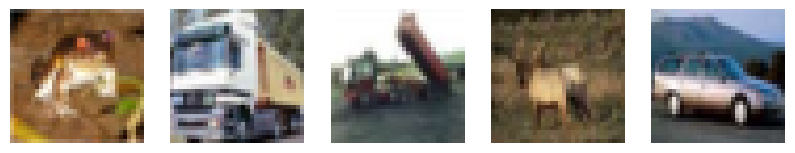

In [3]:
import urllib.request
import tarfile
import os
import matplotlib.pyplot as plt
import pickle

url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_path = "cifar-10-python.tar.gz"

urllib.request.urlretrieve(url, download_path)

extracted_path = "cifar-10-batches-py"

with tarfile.open(download_path, 'r:gz') as tar:
    tar.extractall(path=extracted_path)

corrected_extracted_path = os.path.join(extracted_path, 'cifar-10-batches-py')
batch_path = os.path.join(corrected_extracted_path, 'data_batch_1')

with open(batch_path, 'rb') as f:
    batch = pickle.load(f, encoding='bytes')

data, labels = batch[b'data'], batch[b'labels']
images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for img, ax in zip(images[:5], axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()

for root, dirs, files in os.walk(corrected_extracted_path, topdown=False):
    for name in files:
        os.remove(os.path.join(root, name))
    for name in dirs:
        os.rmdir(os.path.join(root, name))
os.rmdir(corrected_extracted_path)
os.remove(download_path)


In [5]:
from collections import Counter
class_counts = Counter(labels)
print("Number of samples per class:", class_counts)

Number of samples per class: Counter({2: 1032, 6: 1030, 8: 1025, 3: 1016, 0: 1005, 7: 1001, 4: 999, 9: 981, 1: 974, 5: 937})


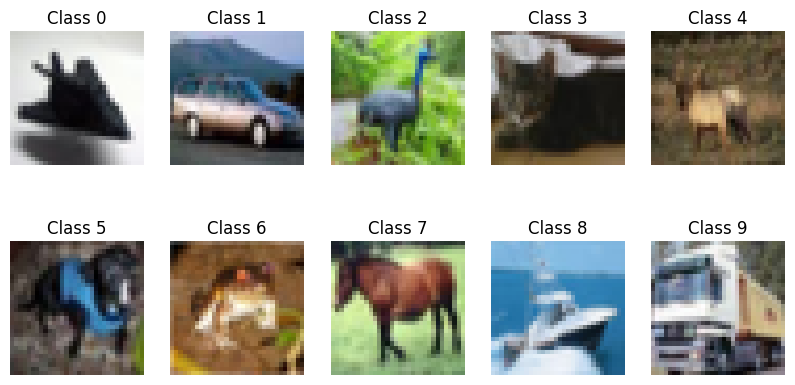

In [6]:
import matplotlib.pyplot as plt

data = batch[b'data']
images = data.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for class_id in range(10):

    index = labels.index(class_id)
    ax = axes[class_id // 5, class_id % 5]
    ax.imshow(images[index])
    ax.set_title(f"Class {class_id}")
    ax.axis('off')
plt.show()


In [7]:
import numpy as np

images = images.astype('float32')
mean = np.mean(images, axis=(0, 1, 2), keepdims=True)
std = np.std(images, axis=(0, 1, 2), keepdims=True)

# Standardization
images = (images - mean) / std

# Normalization
images /= 255.0

print("Images have been normalized.")


Images have been normalized.


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:

labels = np.array(labels)

model.fit(images, labels, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.3822 - loss: 1.6909 - val_accuracy: 0.3890 - val_loss: 1.6703
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.3958 - loss: 1.6639 - val_accuracy: 0.3850 - val_loss: 1.6662
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.4223 - loss: 1.5900 - val_accuracy: 0.3970 - val_loss: 1.6318
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.4328 - loss: 1.5355 - val_accuracy: 0.4170 - val_loss: 1.6013
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.4440 - loss: 1.5306 - val_accuracy: 0.4065 - val_loss: 1.6001
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.4483 - loss: 1.4903 - val_accuracy: 0.4480 - val_loss: 1.5358
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.4619 - loss: 1.4677 - val_accuracy: 0.4490 - val_loss: 1.5225
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.4751 - loss: 1.4396 - 